In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read in `master.csv` generated in `cleaning_act.ipynb`

In [2]:
df = pd.read_csv('data/master.csv')
df.head()

,country,year,literacy_rate,gdp_pc,life_exp_yrs,youth_empl_rate,percent_forest_cover,hdi,pop_density
0,Afghanistan,1991,NaN,1030,51.3,35.9,2.07,0.300,19.9
1,Afghanistan,1992,NaN,950,51.4,37.5,2.07,0.309,21.4
2,Afghanistan,1993,NaN,818,51.4,35.7,2.07,0.305,23.1
3,Afghanistan,1994,NaN,732,50.7,35.8,2.07,0.300,24.8
4,Afghanistan,1995,NaN,881,51.1,39.8,2.07,0.324,26.2


Change the `year` column dtype to datetime:

In [7]:
df['year'] = pd.to_datetime(df['year'], format = '%Y')

## Exploratory Data Analysis:

The data is for years in the range:

In [5]:
df.year.min(), df.year.max()

(1991, 2011)

### Lets see how each of the metrics has changed, world over, throughout our range of years

In [11]:
df_grouped_by_year = df.drop(columns = ['country'], axis = 'columns').groupby('year').mean()
df_grouped_by_year

,literacy_rate,gdp_pc,life_exp_yrs,youth_empl_rate,percent_forest_cover,hdi,pop_density
year,,,,,,,
1991-01-01,71.590909,9081.438356,64.869863,41.842466,31.211382,0.554458,126.660890
1992-01-01,79.044444,9163.780822,64.945890,41.789041,30.518380,0.556263,129.098356
1993-01-01,62.925000,9165.054795,64.897945,41.342466,30.231250,0.559839,131.504110
1994-01-01,64.618182,9257.020548,64.702055,41.000685,30.220139,0.563551,133.949521
1995-01-01,84.340000,9462.719178,64.982877,40.636301,30.145417,0.569537,136.395068
1996-01-01,66.425000,9689.993151,65.160959,40.065068,30.065833,0.575008,138.870479
1997-01-01,69.366667,10062.472603,65.320548,39.873973,29.991528,0.580413,141.405274
1998-01-01,45.900000,10199.753425,65.384932,39.632192,29.958056,0.585595,144.064658
1999-01-01,88.600000,10235.958904,65.502055,39.343836,29.882153,0.586724,146.759384


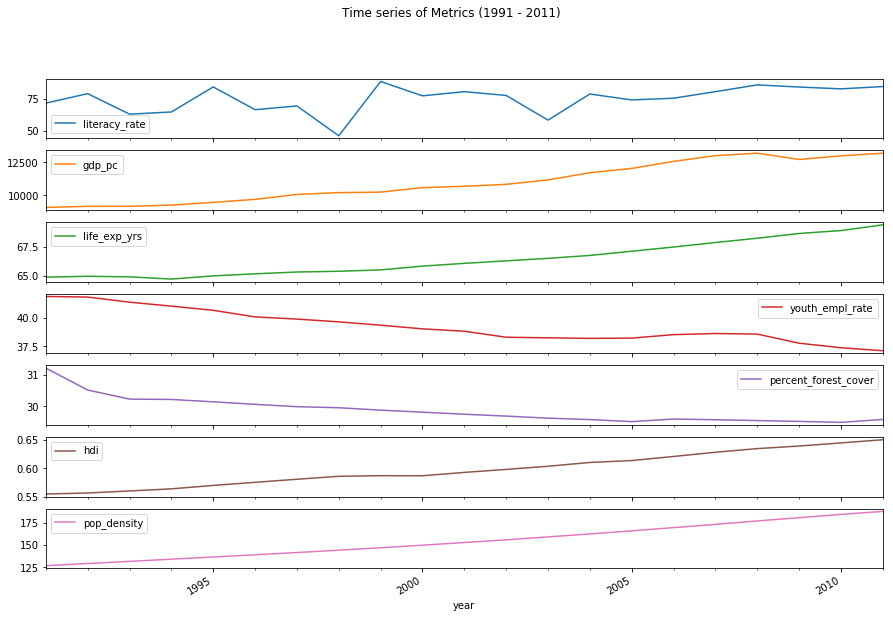

In [94]:
df_grouped_by_year.plot(figsize = (15,10),subplots = True, title = 'Time series of Metrics (1991 - 2011)');

> __Incremental trends:__ <br>
> - Literacy Rate
> - GDP Per Capita
> - Life Expectancy Years
> - Human Development Index (HDI)
> - Population Density
>
>
> __Decremental trends:__ <br>
> - Youth Employment Rate (Age: 15 - 24)
> - Percentage Forest Cover
>
>
> The trends look to be intuitive. The decrease in Youth Employment Rate could be explained by more years being spent in the eductaional phase. This requires further investigation.
>
> The fluctuations in the Literacy Rate likely stem from absence of data for the Literacy metric.

### Lets investigate country-wise Literacy Rates. Which countries have the highest or lowest literacy rates ever recorded?

In [181]:
# separate the bottom and top 20 countries by literacy rate
top_20_literate_countries_2011 = df.groupby('country').max()['literacy_rate'].sort_values(ascending = False)[:20]
bottom_20_literate_countries_2011 = df.groupby('country').max()['literacy_rate'].sort_values(ascending = True)[:20]


#Note: the last country in the bottom 

# select color palette
pal_top = sns.color_palette("Greens_r", len(top_20_literate_countries_2011))
pal_bottom = sns.color_palette("Reds_r", len(bottom_20_literate_countries_2011))



# define function to rank the percentage values
def rankmin(x):
    u, inv, counts = np.unique(x, return_inverse=True, return_counts=True)
    csum = np.zeros_like(counts)
    csum[1:] = counts[:-1].cumsum()
    return csum[inv]

# calculate the rank for each percentage value
rank = rankmin(bottom_20_literate_countries_2011)

ticks = np.arange(0, 100 + 20, 20)

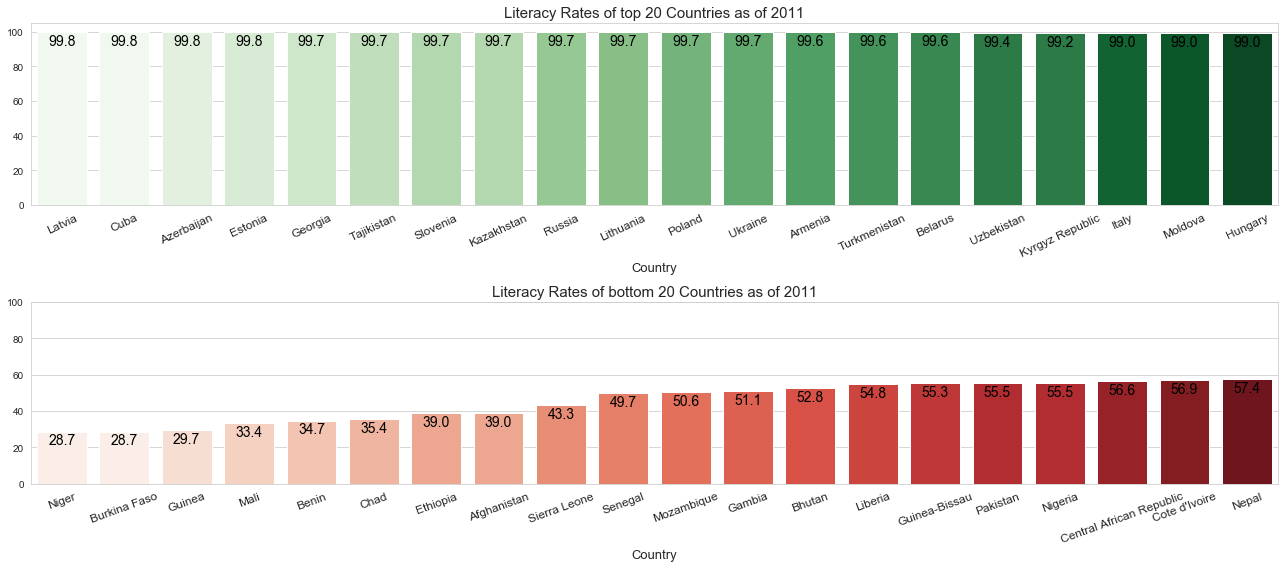

In [186]:
# plot
plt.figure(figsize = (18, 8))
sns.set_style("whitegrid")
#=========================================plot for top 20 countries========================================================

plt.subplot(2, 1, 1)
splot = sns.barplot(top_20_literate_countries_2011.index, top_20_literate_countries_2011.values, 
                    palette=np.array(pal_top[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                  fontsize = 14)


# labeling
plt.title('Literacy Rates of top 20 Countries as of 2011', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 25, fontsize = 12)
plt.yticks(ticks, ticks)

#======================================plot for bottom 20 countries========================================================
plt.subplot(2, 1, 2)
splot = sns.barplot(bottom_20_literate_countries_2011.index, bottom_20_literate_countries_2011.values, 
                    palette=np.array(pal_bottom[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                   fontsize = 14)
    

#labeling 
plt.title('Literacy Rates of bottom 20 Countries as of 2011', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 20, fontsize = 12)
plt.yticks(ticks, ticks)

plt.tight_layout()

> Its easy to see Hungary, Moldova, and Italy share the highest literacy rate ever recorded while countries like Niger, Burkina Faso, Guinea and Mali lie at the bottom end of the spectrum.

### Lets examine the relationship between the metrics for the latest year - 2011 in the dataset. It makes sense for Percentage Forest Cover to have a negative correlation with Population Density. Lets see what the data has to say.

In [192]:
df1 = df.groupby(['country', 'year']).min().query('year == 2011')
df1.head()

,,literacy_rate,gdp_pc,life_exp_yrs,youth_empl_rate,percent_forest_cover,hdi,pop_density
country,year,,,,,,,
Afghanistan,2011-01-01,39.0,1660,56.7,39.8,2.07,0.463,45.5
Albania,2011-01-01,96.8,10200,76.7,24.8,28.30,0.752,107.0
Algeria,2011-01-01,NaN,13000,76.7,21.6,0.81,0.732,15.5
Angola,2011-01-01,70.4,5910,60.9,48.3,46.80,0.508,19.4
Argentina,2011-01-01,97.9,19600,76.0,33.3,10.30,0.822,15.2


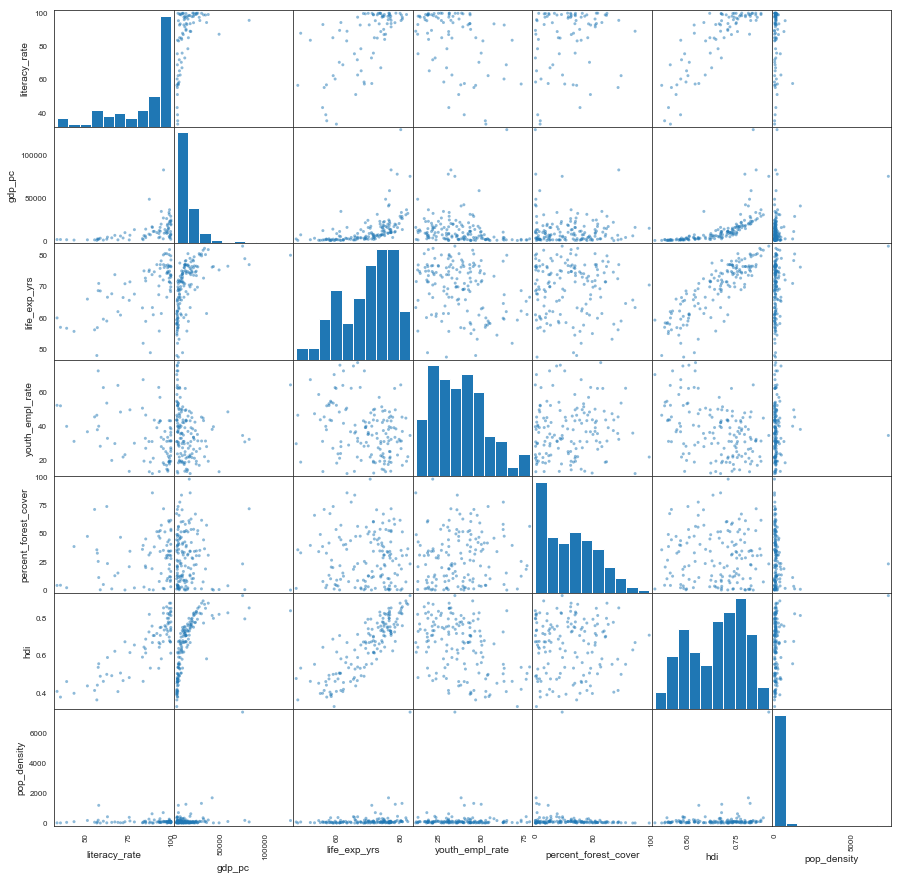

In [243]:
sns.set_style('white')
pd.plotting.scatter_matrix(df1, figsize = (15, 15));

Before we try to answer our question, lets look at the distribution of both the metrics.

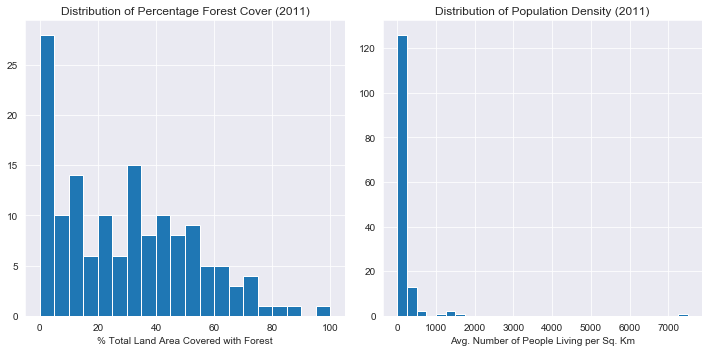

In [227]:
plt.figure(figsize = (10, 5))

bins = np.arange(0, df1.percent_forest_cover.max() + 5, 5)
plt.subplot(1, 2, 1)
plt.hist(data = df1, x = 'percent_forest_cover', bins = bins)
plt.title('Distribution of Percentage Forest Cover (2011)', fontsize = 12)
plt.xlabel('% Total Land Area Covered with Forest', fontsize = 10)


bins = np.arange(0, df1.pop_density.max() + 250, 250)
plt.subplot(1, 2, 2)
plt.hist(data = df1, x = 'pop_density', bins = bins)
plt.title('Distribution of Population Density (2011)')
plt.xlabel('Avg. Number of People Living per Sq. Km', fontsize = 10)
plt.tight_layout();

> - The distribution for Percentage Forest Cover seems to be erratic. However its clear that a large number of countries fall in the 0% - 4.99% bin. That sounds like awful news for our planet.
> - The distribution for Population Density seems to be crowded below the 750 people per sq. km mark. This means most of the people in the world live in sparsely populated countries.
> - __Its interesting to note that although most people live in sparsely populated countries, the number of countries having very low forest cover is proportionately high. <br>This means that we still have lots of land; its just that its not covered by forest.__ 
> - There seems to be an outlier above the 7000 mark for Population Density. This requires further investigation.

Lets make a Scatter Plot to study the relationship between these two metrics in more detail.

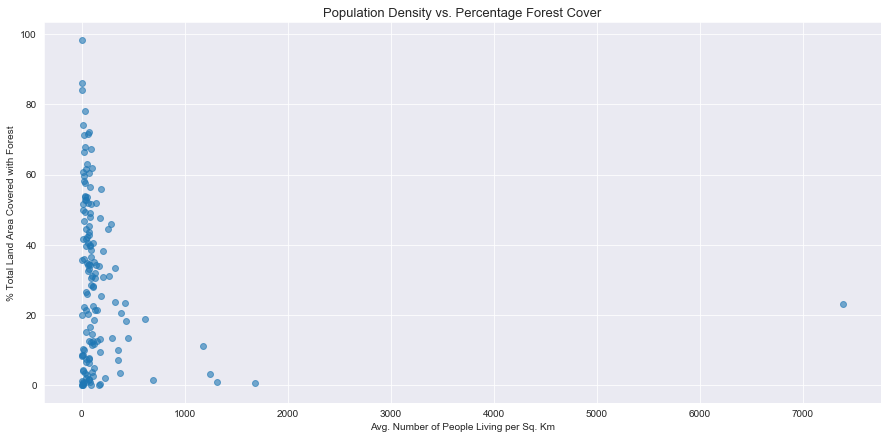

In [265]:
plt.figure(figsize = (15, 7))
sns.regplot(data = df1, x = 'pop_density', y = 'percent_forest_cover', fit_reg = False, scatter_kws = {'alpha':0.6});

plt.title('Population Density vs. Percentage Forest Cover', fontsize = 13)
plt.xlabel('Avg. Number of People Living per Sq. Km', fontsize = 10)
plt.ylabel('% Total Land Area Covered with Forest', fontsize = 10);

Lets zoom in on the data:

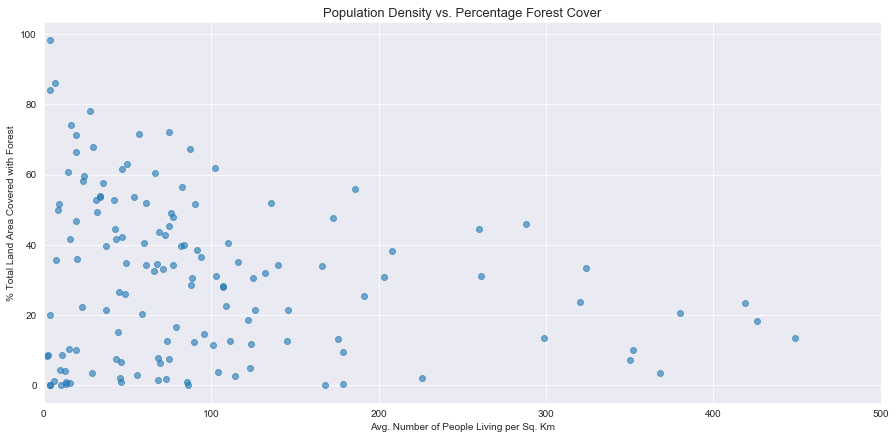

In [296]:
plt.figure(figsize = (15, 7))
sns.regplot(data = df1, x = 'pop_density', y = 'percent_forest_cover', fit_reg = False, scatter_kws = {'alpha':0.6});
plt.xlim(0, 500)

plt.title('Population Density vs. Percentage Forest Cover', fontsize = 13)
plt.xlabel('Avg. Number of People Living per Sq. Km', fontsize = 10)
plt.ylabel('% Total Land Area Covered with Forest', fontsize = 10);

Lets calculate the Correlation:

In [252]:
df1[['pop_density', 'percent_forest_cover']].corr()

,pop_density,percent_forest_cover
pop_density,1.000000,-0.122119
percent_forest_cover,-0.122119,1.000000


Lets look at the outlier beyond the 7000 mark

In [295]:
df1.query('pop_density > 7000')

,,literacy_rate,gdp_pc,life_exp_yrs,youth_empl_rate,percent_forest_cover,hdi,pop_density
country,year,,,,,,,
Singapore,2011-01-01,NaN,75000,82.9,34.4,23.2,0.917,7390.0


A quick Google Search tells that this value is valid and consistent with other sources.

> There is a weak correlation between Percentage Forest Cover and Population Density. This can be explained by the existence of a large percentage of land that is uninhabitable. The findings here seem to reinforce our earlier conclusion that "we still have land; its just that its not covered by forest". Whether this oberved effect is stastically significant, requires further investion.

### Lets explore the relationship between other two metrics: Does Human Development Index correlate with Life Expectancy in Years?

Here too, we will be using the data for 2011 stored in `df1`.

In [297]:
df1.describe()

,literacy_rate,gdp_pc,life_exp_yrs,youth_empl_rate,percent_forest_cover,hdi,pop_density
count,79.000000,146.000000,146.000000,146.000000,145.000000,146.000000,146.000000
mean,84.622785,13172.089041,69.445890,37.121918,29.588759,0.649808,187.557534
std,17.888809,17206.862720,8.161424,15.294987,22.931895,0.144759,645.331719
min,33.400000,630.000000,47.500000,11.800000,0.000000,0.331000,1.780000
25%,74.250000,2675.000000,62.975000,24.825000,8.780000,0.530000,32.125000
50%,93.000000,7980.000000,71.500000,36.000000,28.300000,0.673500,73.300000
75%,98.400000,16825.000000,76.075000,46.275000,46.000000,0.764500,125.750000
max,99.800000,129000.000000,82.900000,77.600000,98.400000,0.917000,7390.000000


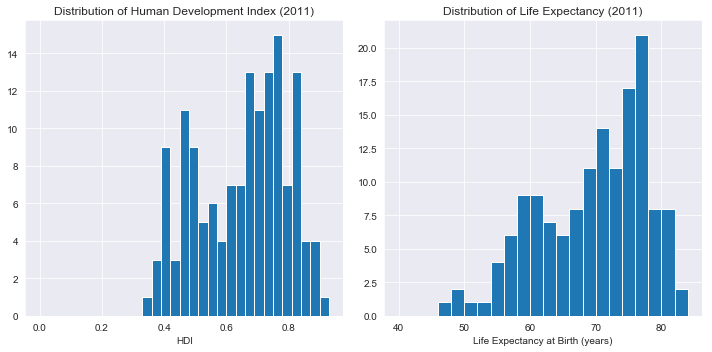

In [317]:
plt.figure(figsize = (10, 5))

bins = np.arange(0, df1.hdi.max() + 0.03, 0.03)
plt.subplot(1, 2, 1)
plt.hist(data = df1, x = 'hdi', bins = bins)
plt.title('Distribution of Human Development Index (2011)', fontsize = 12)
plt.xlabel('HDI', fontsize = 10)

bins = np.arange(40, df1.life_exp_yrs.max() + 2, 2)
plt.subplot(1, 2, 2)
plt.hist(data = df1, x = 'life_exp_yrs', bins = bins)
plt.title('Distribution of Life Expectancy (2011)', fontsize = 12)
plt.xlabel('Life Expectancy at Birth (years)', fontsize = 10)
plt.tight_layout();

> Both distributions seem to be generally bimodal. 

Lets investigate further.

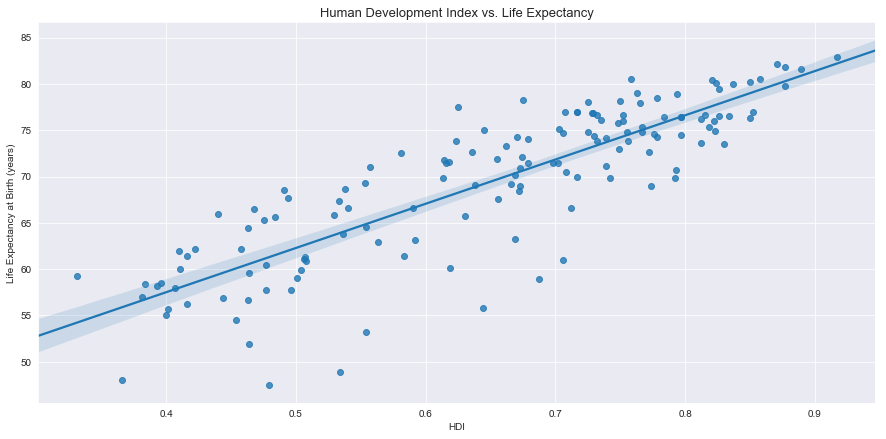

In [320]:
plt.figure(figsize = (15, 7))
sns.regplot(data = df1, x = 'hdi', y = 'life_exp_yrs', fit_reg = True);

plt.title('Human Development Index vs. Life Expectancy', fontsize = 13)
plt.xlabel('HDI', fontsize = 10)
plt.ylabel('Life Expectancy at Birth (years)', fontsize = 10);

In [322]:
df1[['life_exp_yrs', 'hdi']].corr()

,life_exp_yrs,hdi
life_exp_yrs,1.000000,0.847079
hdi,0.847079,1.000000


> The HDI has three dimensions: health, education and living standard. It looks to be a good predictor for Life Expectancy.